# 1. EDA (continued)

In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import *
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display
import matplotlib.font_manager as fm
from collections import Counter
import os

In [2]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)

print(font_name)
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


# 1.EDA

In [3]:
label_kor2eng = {
    '행복' : 'happiness',
    '놀람' : 'surprise',
    '분노' : 'anger',
    '공포' : 'fear',
    '혐오' : 'disgust',
    '슬픔' : 'sadness',
    '중립' : 'neutralism'
}

LABELS = set(label_kor2eng.values())

COL_NAME = ['text', 'label']

In [4]:
df = pd.read_csv("cleaned_data.csv")

In [5]:
df.head()

,text,label
0,언니 동생으로 부르는게 맞는 일인가요..??,fear
1,그냥 내 느낌일뿐겠지?,fear
2,아직너무초기라서 그런거죠?,fear
3,유치원버스 사고 낫다던데,fear
4,근데 원래이런거맞나요,fear


In [6]:
df.shape

(38509, 2)

,text,label
35819,광화문 파란집에 쳐 박혀 있잖아!!!,disgust
7112,언제부터 그렇게 깨끗했다고 새삼스럽게,surprise
25020,역시나 갓삼성 교환ㄷ,neutralism
35512,엘지가 차우찬 데려오고 삼성에서 최재원 다시 데려가면 진짜 웃기겠다 ㅋㅋ,disgust
19928,얼마후 사고소식듣고 충격이 얼마나 컸는지..,sadness
36723,지금.이시간...서해에선.짱깨이들.열심히.꽃게.잡고.있겠구만...,disgust
35614,병신같은..맨날어렵데...,disgust
31680,이제시험끝나서//야구두 볼수있구여....,happiness
22604,핵그네처럼 속보이는 거짓말 보단 솔직해서 좋긴 하네.,neutralism
5452,사귄지 1주년될땐 커플링할수있겠죠?..,fear


happiness     6005
surprise      5886
anger         5664
fear          5449
disgust       5428
sadness       5250
neutralism    4827
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


happiness     0.155938
surprise      0.152847
anger         0.147083
fear          0.141499
disgust       0.140954
sadness       0.136332
neutralism    0.125347
Name: label, dtype: float64

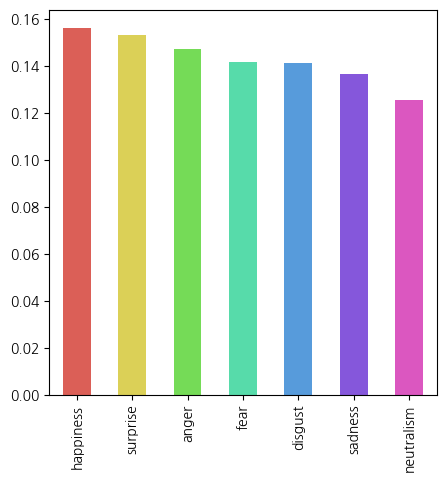

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38509 entries, 0 to 38508
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38509 non-null  object
 1   label   38509 non-null  object
dtypes: object(2)
memory usage: 601.8+ KB


,text,label
count,38509,38509
unique,38509,7
top,언니 동생으로 부르는게 맞는 일인가요..??,happiness
freq,1,6005


In [7]:
# label distribution

display(df.sample(10))
display(df['label'].value_counts())
print("-"*100)
norm_label = df['label'].value_counts(normalize=True)
display(norm_label)
norm_label.plot.bar(figsize=(5,5),color=sns.color_palette('hls',n_colors = len(norm_label)))
plt.show()
df.info()
display(df.describe(include='all'))

------------------------------------------------------------------------------------------------------------------------


count    38509.000000
mean        23.743696
std         13.564831
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max        299.000000
Name: text, dtype: float64

최대 길이:  쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 13789
최소 길이:  아! 10147


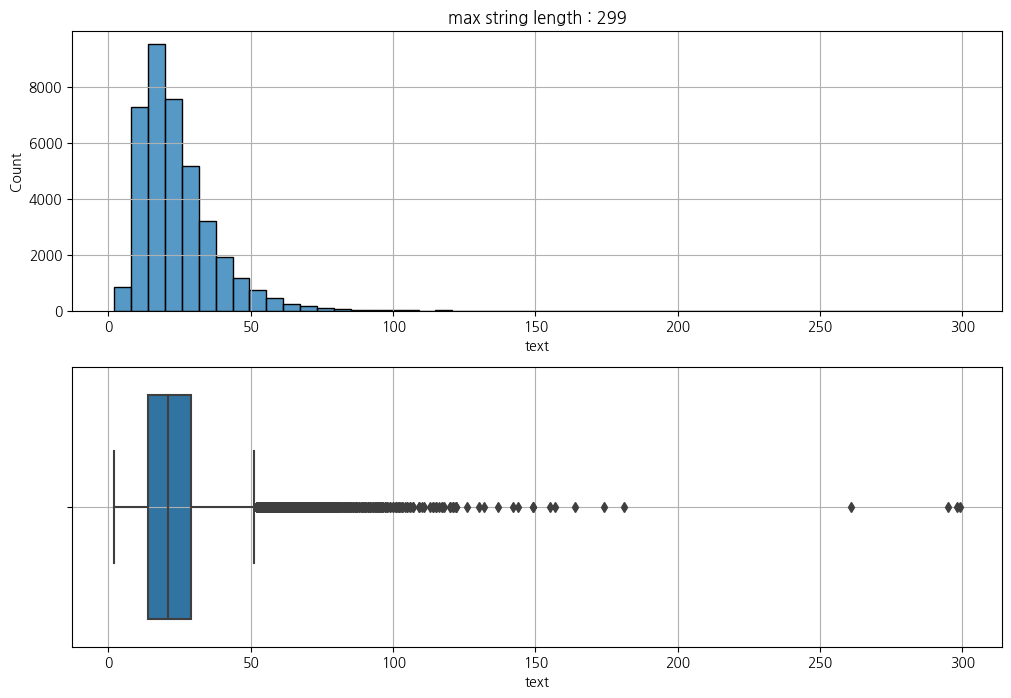

In [8]:
print("-"*120)
text_length = df.text.str.len()
display(text_length.describe())
print("최대 길이: ", df.text[text_length.argmax()], text_length.argmax())
print("최소 길이: ", df.text[text_length.argmin()], text_length.argmin())
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1, title="max string length : " + str(max(text_length)))
sns.histplot(text_length, bins=50)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=text_length)
plt.grid()
plt.show()

---

colab 단계2 부터 여기부터 ㄱㄱ

In [9]:
mecab = Mecab()

morphs = df['text'].apply(lambda sentence : mecab.morphs(str(sentence)))                           # 형태소 분리
nouns = df['text'].apply(lambda sentence : mecab.nouns(str(sentence)))                             # 명사 추출
pos_tuple = df['text'].apply(lambda sentence : mecab.pos(str(sentence)))                           # (형태소, 품사)
pos = df['text'].apply(lambda sentence : list("/".join(res) for res in mecab.pos(str(sentence))))  # 형태소/품사

In [10]:
# Number of Samples / Number of words per sample

print("Number of Samples / Number of words per sample :", len(pos) / pos.apply(len).mean())

Number of Samples / Number of words per sample : 3100.97712967726


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wonhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# % 는 라인 단위 %%는 셀단위
nltk_nouns = nltk.Text(nouns.explode()) 
nltk_nouns = nltk.Text([w for w in nltk_nouns if isinstance(w,str)])

nltk_morphs = nltk.Text(morphs.explode())
nltk_morphs = nltk.Text([w for w in nltk_morphs if isinstance(w,str)])

nltk_pos = nltk.Text(pos.explode())
nltk_pos_tuple = nltk.Text(pos_tuple.explode())

In [14]:
nltk_pos_tuple

<Text: ('언니', 'NNG') ('동생', 'NNG') ('으로', 'JKB') ('부르', 'VV') ('는', 'ETM') ('게', 'NNB+JKS') ('맞', 'VV') ('는', 'ETM')...>

In [15]:
display(nltk_nouns.vocab())
print(len(nltk_nouns.vocab()))

FreqDist({'거': 2901, '것': 1462, '게': 1237, '사람': 1186, 'ㄷ': 1009, '일': 1000, '수': 960, '말': 958, '나라': 958, '때': 863, ...})

16673


In [16]:
display(nltk_pos.vocab())
print(len(nltk_pos.vocab()))

FreqDist({'./SF': 18229, '이/JKS': 7767, '고/EC': 7586, '?/SF': 6806, '는/ETM': 6749, '가/JKS': 5598, '도/JX': 5458, '에/JKB': 5133, '들/XSN': 5102, '하/XSV': 4363, ...})

30846


In [17]:
display(nltk_morphs.vocab())
print(len(nltk_morphs.vocab()))

FreqDist({'.': 20130, '이': 13369, '는': 10170, '하': 9744, '고': 7754, '?': 7152, '가': 6894, '다': 6298, '은': 5643, '도': 5612, ...})

26690


In [18]:
len(set(nltk_nouns))/len(nltk_nouns)

0.11637061594835107

In [19]:
len(set(nltk_pos))/len(nltk_pos)

0.06450196353964091

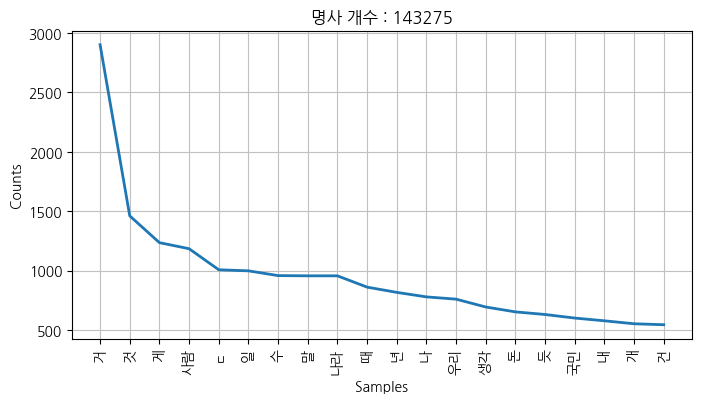

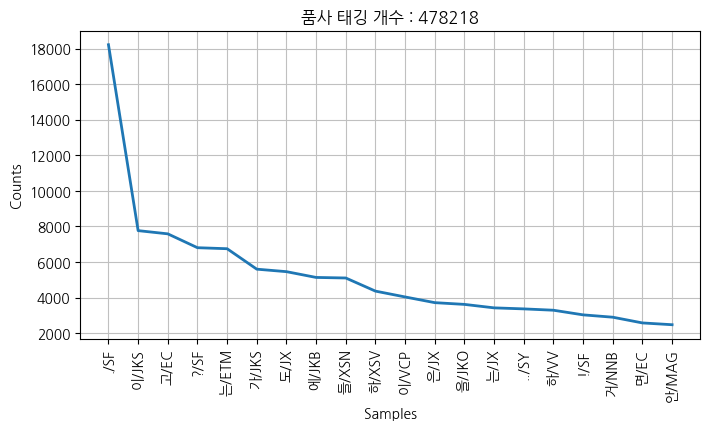

In [20]:
plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_nouns.tokens)))
nltk_nouns.plot(20)
plt.show()
plt.figure(figsize=(8,4))
plt.title("품사 태깅 개수 : " + str(len(nltk_pos.tokens)))
nltk_pos.plot(20)
plt.show()

In [23]:
nltk_morphs.collocations(window_size=5)
print("*"*50)
nltk_nouns.collocations(window_size=5)
print("*"*50)
nltk_pos.collocations(window_size=5)

ㅋㅋㅋ ㅋㅋㅋ; 쓰레기 쓰레기; 어떻게 할까요; 유재석 오라버니; 김대중 노무현; 태어나 고마워요; 결사반대 결사반대; 김종국
송지효; ㅎㅎㅎ ㅎㅎㅎ; 오바마 대통령; 대국민 사기극; 화이팅 입니다; 박근혜 대통령; 전기차 인프라; 카더라 카더라;
노무현 대통령; 장예원 아나운서; 한효주 이종석; 간절히 바란다; 거짓말 탐지기
**************************************************
쓰레기 쓰레기; 유재석 오라버니; 김대중 노무현; 오바마 대통령; 결사반대 결사반대; 김종국 송지효; 대국민 사기극; 오라버니
투게더; 콩깍지 베란다; 콩깍지 콩깍지; 박근혜 대통령; 노무현 대통령; 전기차 인프라; 카더라 카더라; 경헌호 오이지;
마케마케 메이크; 특이점 유토피아; 장예원 아나운서; 한효주 이종석; 드렁큰 타이거
**************************************************
ㅋㅋㅋ/IC ㅋㅋㅋ/IC; ㄷ/NNG ㄷ/NNG; ./SF ../SY; ㅤㅤ/UNKNOWN ㅤㅤ/UNKNOWN; 지/EC
않/VX; ㅋㅋㅋ/IC ㅋㅋ/IC; ,/SC ,/SC; 다/EF ./SF; 수/NNB 있/VV; ./SF ./SY; -/SY
-/SY; 쓰레기/NNG 쓰레기/NNG; 고/EC 있/VX; ~/SY ~/SY; 고/EC 싶/VX; 는/ETM 거/NNB;
같/VA 은/ETM; !/SF !!/SY; ./SF .../SY; 것/NNB 같/VA


In [24]:
from konlpy.utils import pprint
from nltk import collocations

In [25]:
nltk_pos_tuple

<Text: ('언니', 'NNG') ('동생', 'NNG') ('으로', 'JKB') ('부르', 'VV') ('는', 'ETM') ('게', 'NNB+JKS') ('맞', 'VV') ('는', 'ETM')...>

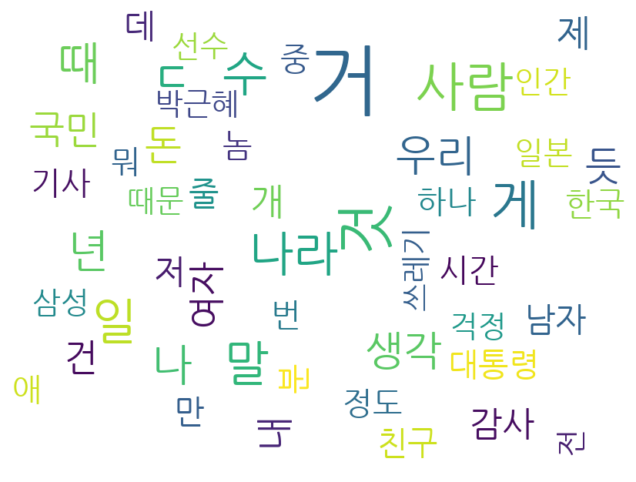

In [26]:
cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate_from_frequencies(nltk_nouns.vocab())
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

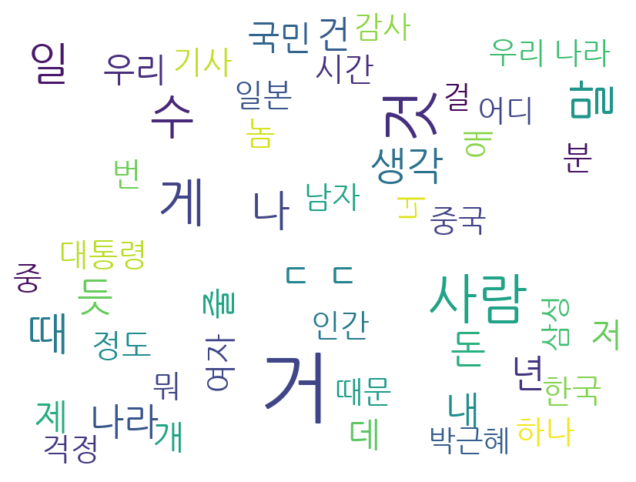

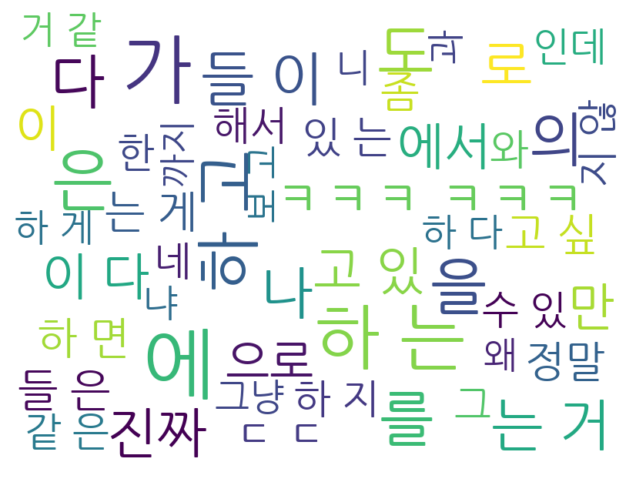

In [27]:
cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate(" ".join(nltk_nouns))
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate(" ".join(nltk_morphs))
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    print("*"*120)
    if label is None:
        text_question = df['text'].reset_index(drop=True)
        display(df.label.value_counts())
        norm_label = df.label.value_counts(normalize=True)
        display(norm_label)
        norm_label.plot.bar(figsize=(5,5),color=sns.color_palette('hls',n_colors = len(norm_label)))
        plt.show()
        df.info()
    else:
        text_question = df.loc[df['label'] == label, 'text'].reset_index(drop=True)
        display(f"유형: {label}",text_question.head(10))
    # 데이터 확인
    display(text_question.describe(include='all'))
    # 데이터 길이 분포 시각화

    text_length = text_question.apply(len)
    display(pd.DataFrame(text_length).describe().T)
    print("-"*120)
    print("최대 길이: ", text_question[text_length.argmax()])
    print("최소 길이: ", text_question[text_length.argmin()])

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1, title="max string length : " + str(max(text_length)))
    sns.histplot(text_length, bins=50)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=text_length)
    plt.grid()
    plt.show()
    print("-"*120)

    nouns = text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns = nltk.Text(nouns.explode())
    nouns = nltk.Text([w for w in nouns if isinstance(w,str)])
    #word cloud
    cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate(" ".join(nouns))
    plt.figure(figsize=(10, 8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    display(nouns.vocab().most_common(n=10))

************************************************************************************************************************


'유형: anger'

0             번호바꾸는 남자는 무슨심리인가요?
1     안영미 저년도 속으론 철렁 하겠구만 ㅉㅉㅉㅉㅉㅉ
2    서해 수자원도 한류라서 그동안 불법조업 방치했나?
3                       니가 인간이가.
4      강아지를 때리고 유기하는것만 학대는 아닙니다!
5          하여간 우리나라 교육엔 미래가 없어!!
6       채널에이 군부 개인거 인증하냐 동아일보야!!
7          비싼 요금들 다 어디로 처먹는지들 ㅉㅉ
8      김기춘이랑 우병우 이색히들은 공개처형시키고싶다
9          닭년이 조언 구했다고 했는데 먼개소리냐
Name: text, dtype: object

count                   5664
unique                  5664
top       번호바꾸는 남자는 무슨심리인가요?
freq                       1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,5664.0,24.420904,14.084334,2.0,15.0,21.0,30.0,299.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기
최소 길이:  염병


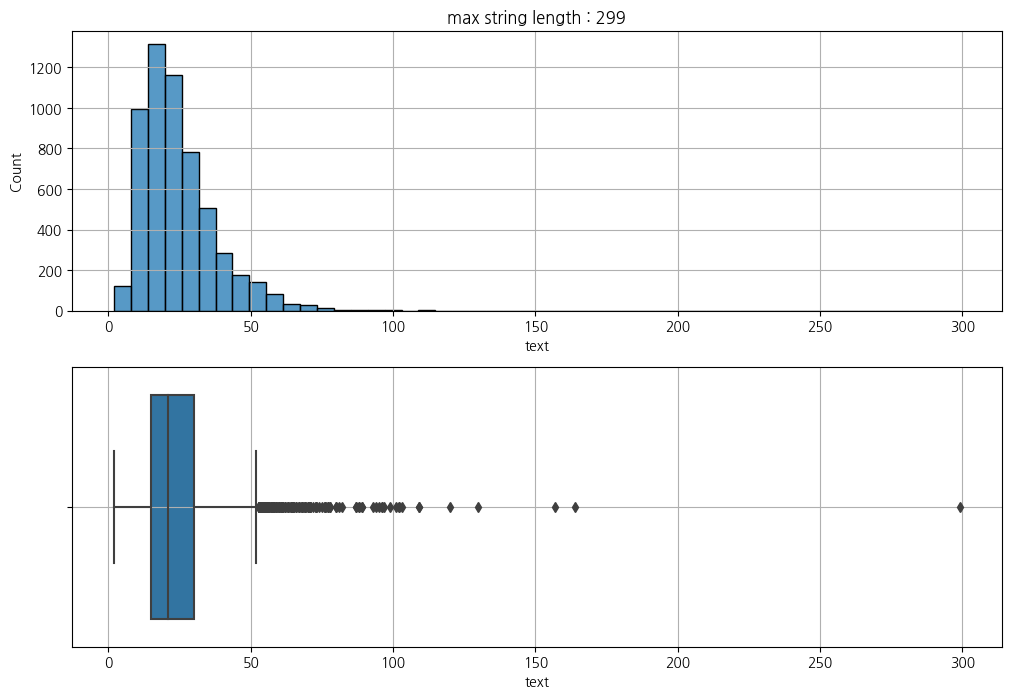

------------------------------------------------------------------------------------------------------------------------


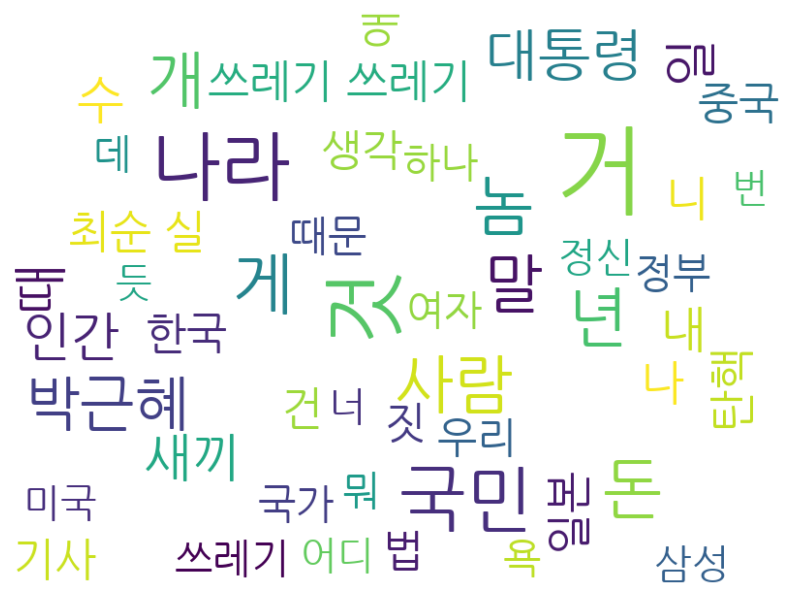

[('거', 387),
 ('나라', 290),
 ('것', 260),
 ('국민', 239),
 ('쓰레기', 208),
 ('년', 200),
 ('개', 192),
 ('게', 174),
 ('놈', 154),
 ('사람', 152)]

************************************************************************************************************************


'유형: disgust'

0                              음...더 머리로 경영할 수 있을까??
1    그 잘나가는 드라마 사이에서 쇼핑왕루이한테도 발린 질투는 어떻게 상을 저리 받는거냐?
2                       저러니까 자신보다 어린 사람한테 미개하다는 소리듣지
3                                     세금을 쳐 내라 양아치들아
4                                   댓글창 냄비근성 토나온다 진짜
5                                  3개월 계약은 뭐하자는 얘기지?
6                            소녀시대 미국인 티파니를 국내에서 추방해라
7                  보수단체라 부르지마라. 그게 어디 보수냐, 알바단체지 !!!
8                                유인나 얼굴이 한겹 더있는거 같다.
9       잠수함은 아닌거같은데 상대가 워낙 구라쟁이 방산비리 집단이라 누구맞는지 모르겠다
Name: text, dtype: object

count                      5428
unique                     5428
top       음...더 머리로 경영할 수 있을까??
freq                          1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,5428.0,27.052874,16.40383,4.0,16.0,23.0,34.0,295.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 사기꾼 바끄네 니가인간이냐?
최소 길이:  쫒겨나라


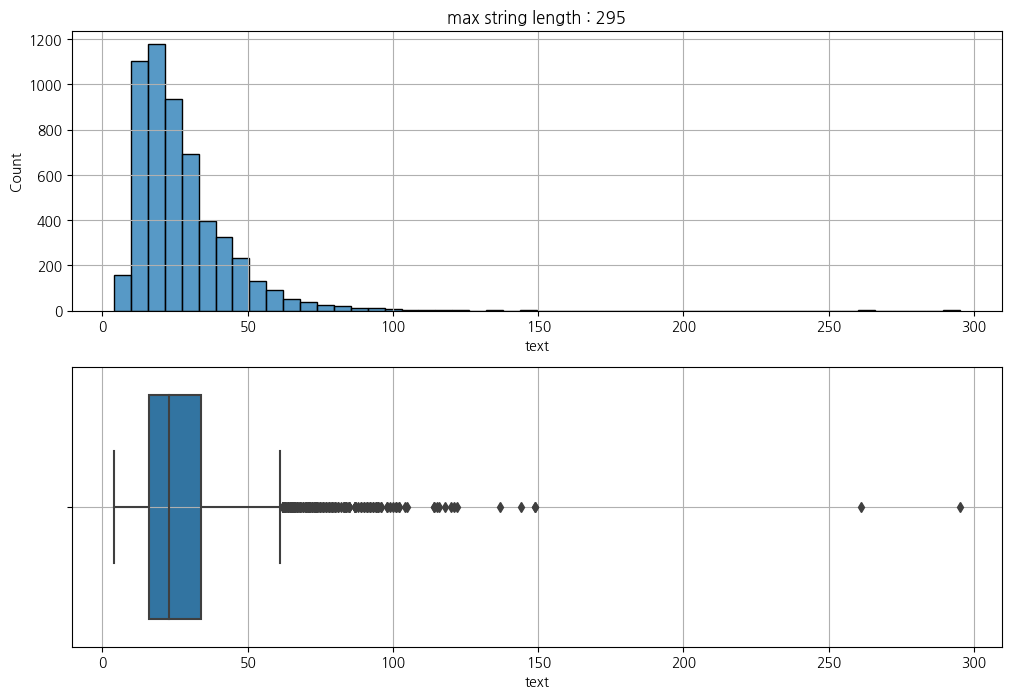

------------------------------------------------------------------------------------------------------------------------


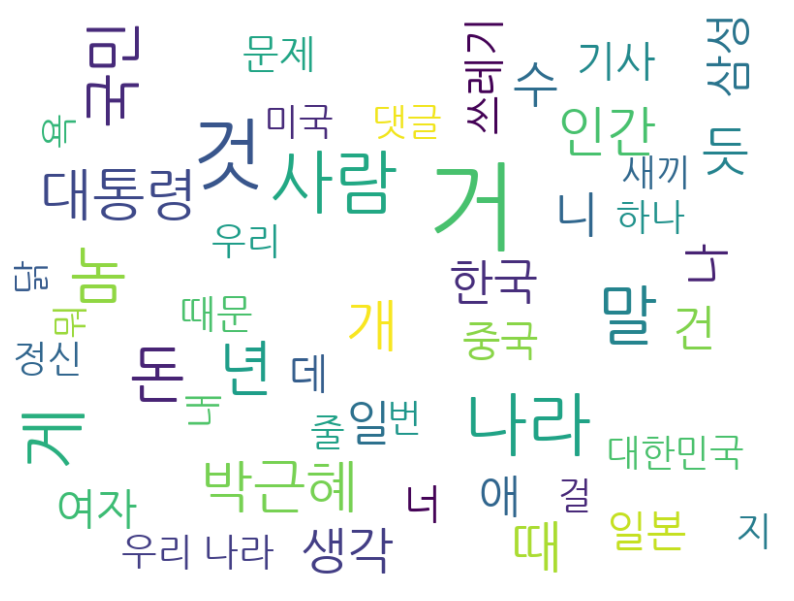

[('거', 450),
 ('나라', 261),
 ('것', 257),
 ('게', 198),
 ('사람', 197),
 ('년', 174),
 ('말', 174),
 ('개', 159),
 ('놈', 155),
 ('국민', 150)]

************************************************************************************************************************


'유형: fear'

0      언니 동생으로 부르는게 맞는 일인가요..??
1                  그냥 내 느낌일뿐겠지?
2                아직너무초기라서 그런거죠?
3                 유치원버스 사고 낫다던데
4                   근데 원래이런거맞나요
5                   남자친구가 떠날까봐요
6       이거 했는데 허리가 아플수도 있나요? ;;
7                  내가불안해서꾸는걸까..
8               일주일도 안 남았당...ㅠㅠ
9    약은 최대한 안먹으려고 하는데좋은 음시있나요?0
Name: text, dtype: object

count                         5449
unique                        5449
top       언니 동생으로 부르는게 맞는 일인가요..??
freq                             1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,5449.0,23.574968,12.260972,4.0,15.0,21.0,29.0,122.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  우주의 미세먼지의 미세먼지만도 못 한 크기의 지구에서 사는 인간이 우주의 먼지만도 못 한 부분밖에 탐사를 못 했는데 그 먼지만도 못 한 부분에서 다른 생명체가 없다고 어떻게 우주에 다른 생명이 없다고 말 할 수 있겠음?
최소 길이:  왜 그래


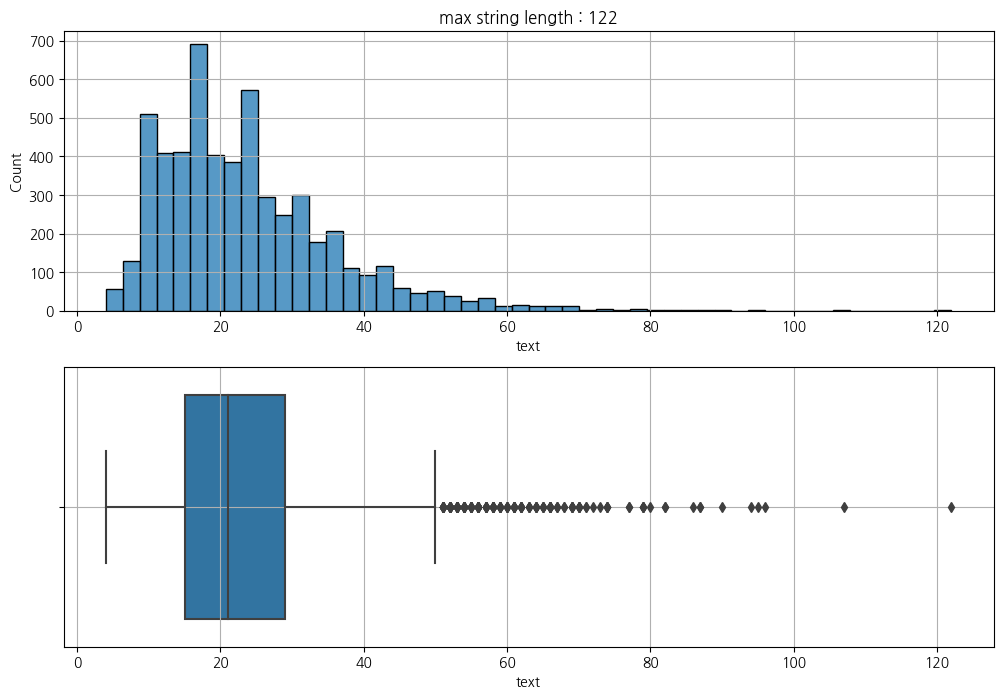

------------------------------------------------------------------------------------------------------------------------


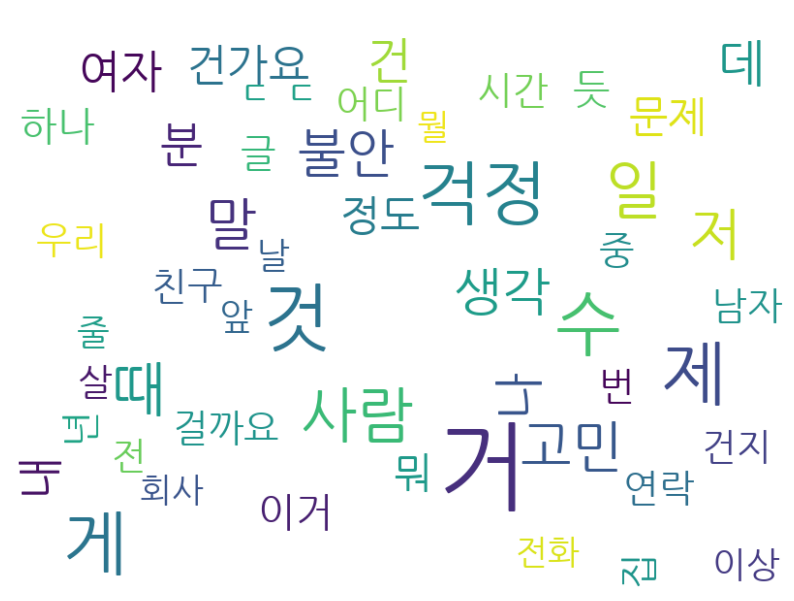

[('거', 473),
 ('것', 237),
 ('게', 236),
 ('제', 218),
 ('걱정', 214),
 ('수', 212),
 ('일', 194),
 ('사람', 159),
 ('고민', 149),
 ('때', 147)]

************************************************************************************************************************


'유형: happiness'

0                                             우리 결혼했어요
1                넘 재미남ㅠㅠ 이민호 넘 존잘에 설레는데 코믹한 연기도 넘 잘해ㅋㅋ
2                                   유재석 오라버니 해피투게더 봤어요
3                  우리모두 준혁이성과 LG선수들이 선전할수 있게 기를 넣어줍시다.
4                                       웃긴거 알죠?~ㅋㅋㅇ ㅏ~
5                               덕분에 주방에서 요리하는게 넘 좋아졌어요
6           마지막 순간 손가락으로 총을 만들어 쏘실때에는 제가 직접 맞는 것 같습니다.
7    어떻게 여성 요리사 보다 더 인기가 많으신지...저도 늘 반찬 만들때 따라하고 있답니다.
8                         우리에게 맛있는 음식을 전하시는 백주부님 당신 멋져
9                        활동혜택으로 오션월드 입장권 2매까지 주는 폴인러버!
Name: text, dtype: object

count         6005
unique        6005
top       우리 결혼했어요
freq             1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,6005.0,22.845629,14.114243,3.0,13.0,19.0,29.0,298.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  그냥 내비둬 웃음을 주잖아ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
최소 길이:  축 제


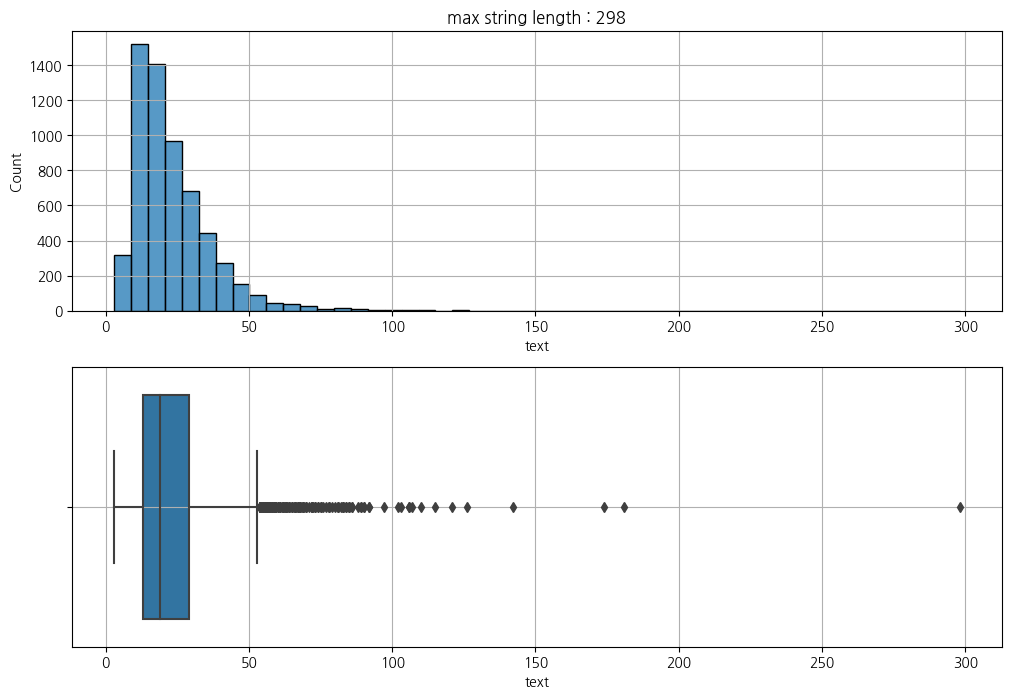

------------------------------------------------------------------------------------------------------------------------


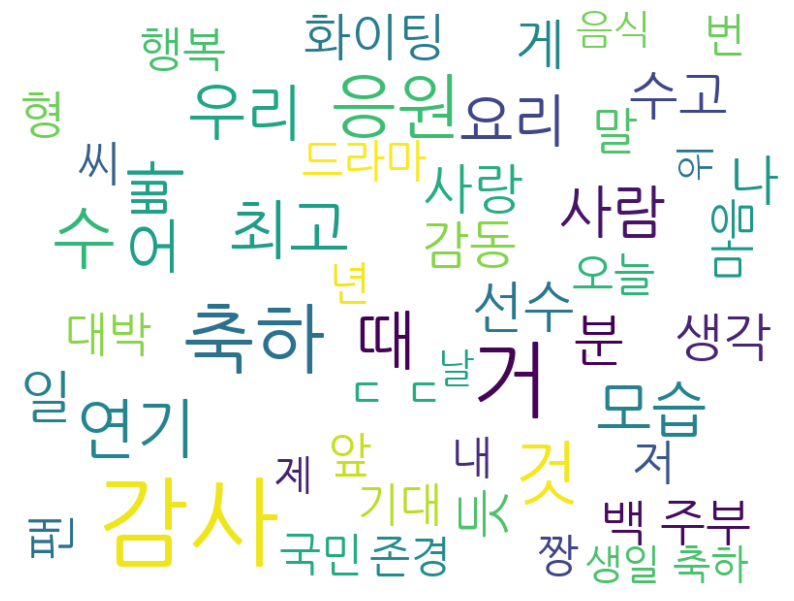

[('감사', 500),
 ('축하', 288),
 ('거', 243),
 ('선수', 161),
 ('것', 161),
 ('응원', 161),
 ('오빠', 155),
 ('수', 151),
 ('우리', 146),
 ('최고', 142)]

************************************************************************************************************************


'유형: neutralism'

0                                            방법이 없을까요?
1                                              언제 통계냈냐
2                                 소량은 먹어도 인체에 해롭지 않고요.
3                        그래도 청문회 나온 놈들보다는 정직한 대답 한것 같다
4                                 이런일 터지기전에 이미 계약 했을까?
5                                      좀더 신중할필요가 있다...
6                                         이번엔 베터리 색상은?
7    근데 탈모도 아버지가 머리가풍성해도 아들은 탈모이고 아버지가 탈모여도 아들은 머리가...
8                        최형우를 잡으려면 계약금은 최소 연봉은 최대로....
9                              제작진 쪽에서는 이미 같이 하자고 했겠지.
Name: text, dtype: object

count           4827
unique          4827
top        방법이 없을까요?
freq               1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,4827.0,23.64595,12.865558,4.0,15.0,20.0,29.0,155.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  매주토요일은 호남향우회 운동회 ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ
최소 길이:  싸나이네


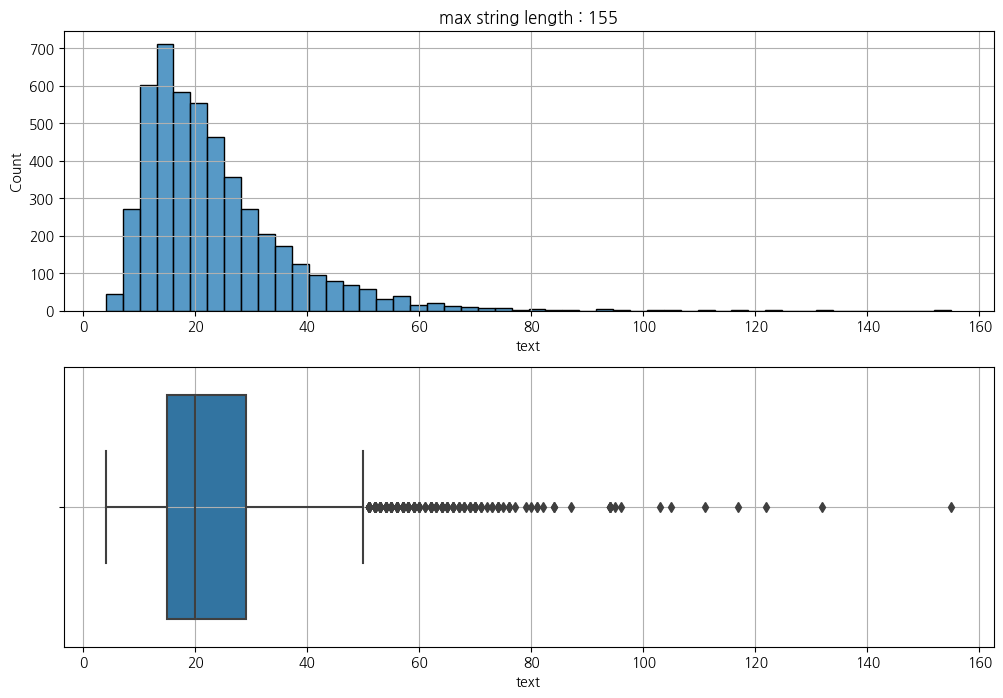

------------------------------------------------------------------------------------------------------------------------


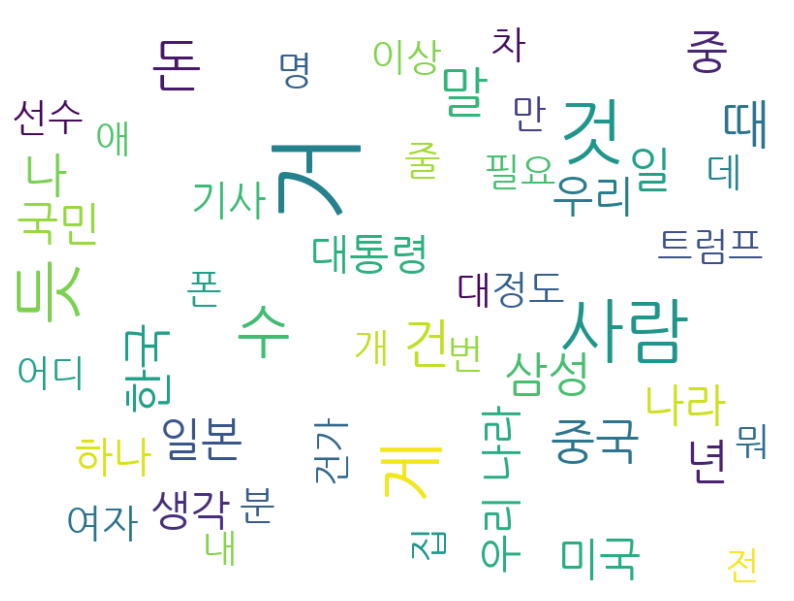

[('거', 430),
 ('것', 198),
 ('사람', 185),
 ('듯', 185),
 ('게', 174),
 ('우리', 134),
 ('나라', 132),
 ('수', 122),
 ('돈', 105),
 ('말', 104)]

************************************************************************************************************************


'유형: sadness'

0                         고수님들 도와주세요
1         사랑하는 사람 아이갖고 싶은게 정말 미친건가요?
2                          내년에 잘 될까요
3                             너무힘들어요
4                              도와주세요
5                        어떻게 해야 할까요?
6              어깨라도넓엇으면 옷빨이라도 잘살텐데..
7                        그저 보고싶어죽겟어요
8    아 진짜 저한테는 악운만 붙는거같네요ㅠㅠ........0
9                       지금 계단에서울고있어요
Name: text, dtype: object

count            5250
unique           5250
top        고수님들 도와주세요
freq                1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,5250.0,23.594667,12.227268,2.0,15.0,21.0,29.0,103.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  한화선수들은 불쌍하다..세이콘 그놈 밑에 있으면 잘하면 아작날거 같아서 응기슬쩍 태업하다가 좀 휴식 취하고 싶어도 2군 서산캠프가면 2군감독 행세하는 개삑꾸 새끼콘이 있고 ㅎㅎㅎㅎㅎㅎㅎ
최소 길이:  덥다


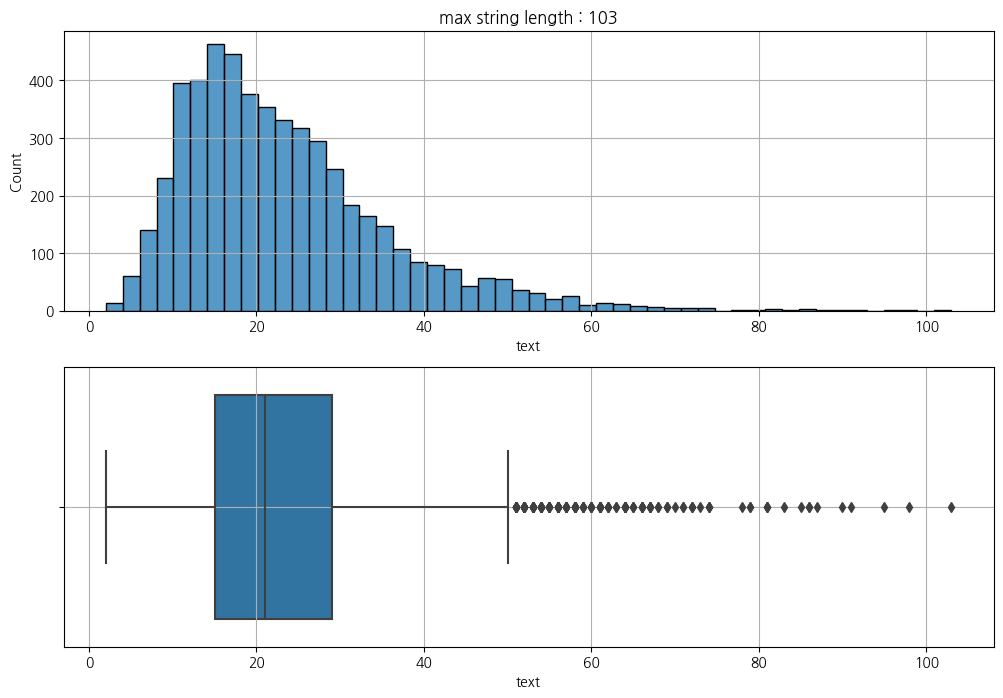

------------------------------------------------------------------------------------------------------------------------


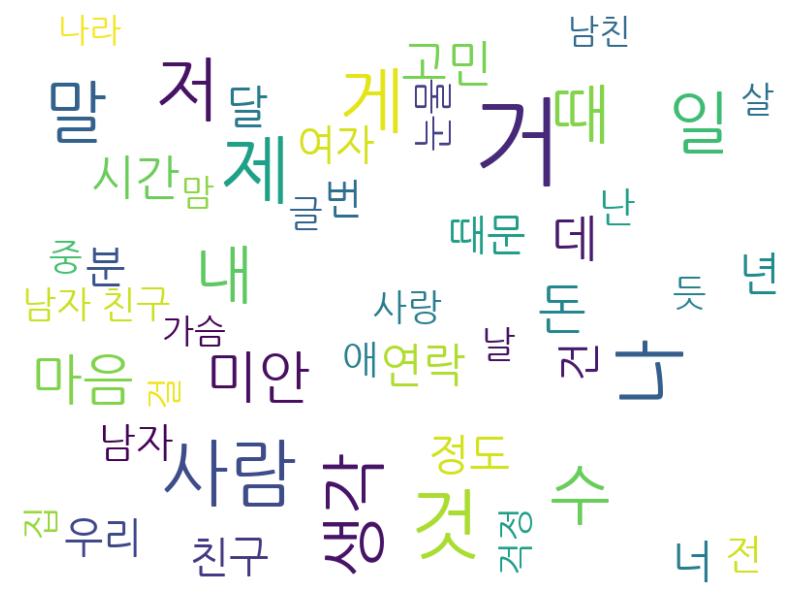

[('거', 375),
 ('것', 213),
 ('나', 210),
 ('게', 204),
 ('제', 200),
 ('사람', 192),
 ('일', 189),
 ('저', 181),
 ('말', 171),
 ('생각', 166)]

************************************************************************************************************************


'유형: surprise'

0                 너무 단호해서 어찌할바를 모르겠어요;
1                            이게 말이 되요?
2                        7로 나온다든데 아니었나
3                         의사양반 내가고자라니!
4             이 사람 얼굴이 약간 전라도 사람처럼 생겼네
5                           아직도 안잡았냐??
6    이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ
7                             똥꼬 그냥 확.
8                           진짜 종횡무진하잖아
9                    미군 주둔하면 식민지라며? ㅎㄷ
Name: text, dtype: object

count                     5886
unique                    5886
top       너무 단호해서 어찌할바를 모르겠어요;
freq                         1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,5886.0,21.325858,11.671742,2.0,13.0,19.0,27.0,117.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  블랙리스트???? 좀더 알아봐여. 하두 조작을 많이 해서 믿을수 있어야쥐. 언론도 검찰도 이제는 믿을수가 없네여. 국정농단 테블릿피씨 조작된거 확인되었는데 이미 고발까지 한 사안인데 이건 언제 조사하나여????
최소 길이:  아!


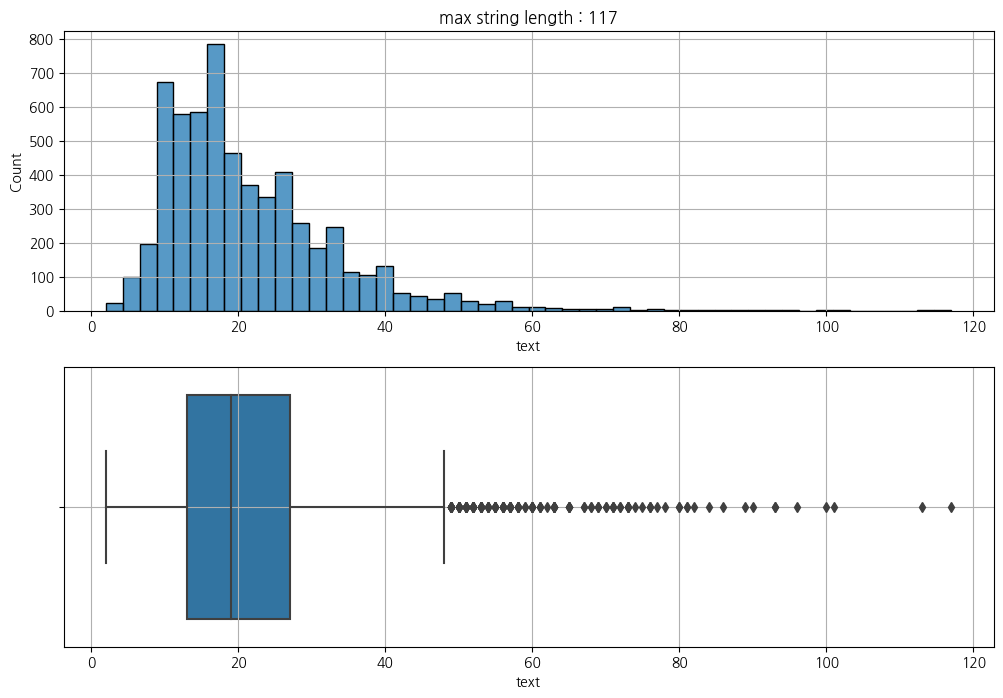

------------------------------------------------------------------------------------------------------------------------


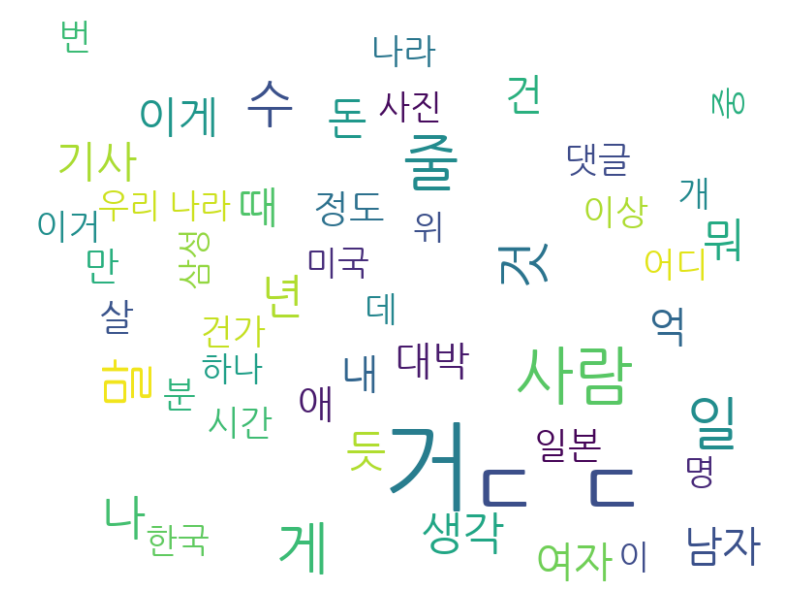

[('ㄷ', 694),
 ('거', 543),
 ('사람', 194),
 ('줄', 168),
 ('일', 167),
 ('게', 159),
 ('것', 136),
 ('말', 135),
 ('년', 123),
 ('수', 121)]

In [30]:
for label in sorted(df.label.unique()):
    text_analysis(df,label)